In [34]:
import json

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [36]:
import pandas as pd

data = pd.read_json('C:/Users/Musaddique/OneDrive/Desktop/yelp_academic_dataset_business.json', lines=True)

In [44]:
data.head

<bound method NDFrame.head of                    business_id                     name               address  \
0       6iYb2HFDywm3zjuRg0shjw      Oskar Blues Taproom          921 Pearl St   
1       tCbdrRPZA0oiIYSmHG3J0w  Flying Elephants at PDX   7000 NE Airport Way   
2       bvN78flM8NLprQ1a1y5dRg           The Reclaimory    4720 Hawthorne Ave   
3       oaepsyvc0J17qwi8cfrOWg              Great Clips    2566 Enterprise Rd   
4       PE9uqAjdw0E4-8mjGl3wVA        Crossfit Terminus   1046 Memorial Dr SE   
...                        ...                      ...                   ...   
160580  D2mHoIDXx9N8mS1pGoKV9Q       Eleven Oaks Realty                         
160581  bQX-kwVTyZgcdZGEPzce6Q             Webb's Honey    21777 State Rd 520   
160582  wvFZ06nmPmQ2-IVoPqVYLA    Painting with a Twist  2164 S Chickasaw Trl   
160583  GB75wPibj3IjNauaoCxyGA              Havana Cafe        910 NW 14th St   
160584  ngmLL5Y5OT-bYHKU0kKrYA              Zora Grille   1370 E Altamonte Dr  

In [45]:
data.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [46]:
data.describe

<bound method NDFrame.describe of                    business_id                     name               address  \
0       6iYb2HFDywm3zjuRg0shjw      Oskar Blues Taproom          921 Pearl St   
1       tCbdrRPZA0oiIYSmHG3J0w  Flying Elephants at PDX   7000 NE Airport Way   
2       bvN78flM8NLprQ1a1y5dRg           The Reclaimory    4720 Hawthorne Ave   
3       oaepsyvc0J17qwi8cfrOWg              Great Clips    2566 Enterprise Rd   
4       PE9uqAjdw0E4-8mjGl3wVA        Crossfit Terminus   1046 Memorial Dr SE   
...                        ...                      ...                   ...   
160580  D2mHoIDXx9N8mS1pGoKV9Q       Eleven Oaks Realty                         
160581  bQX-kwVTyZgcdZGEPzce6Q             Webb's Honey    21777 State Rd 520   
160582  wvFZ06nmPmQ2-IVoPqVYLA    Painting with a Twist  2164 S Chickasaw Trl   
160583  GB75wPibj3IjNauaoCxyGA              Havana Cafe        910 NW 14th St   
160584  ngmLL5Y5OT-bYHKU0kKrYA              Zora Grille   1370 E Altamonte 

In [47]:
type(data)

pandas.core.frame.DataFrame

In [48]:
#!python -m spacy download en_core_web_sm

In [49]:
data

business_id                     name               address  \
0       6iYb2HFDywm3zjuRg0shjw      Oskar Blues Taproom          921 Pearl St   
1       tCbdrRPZA0oiIYSmHG3J0w  Flying Elephants at PDX   7000 NE Airport Way   
2       bvN78flM8NLprQ1a1y5dRg           The Reclaimory    4720 Hawthorne Ave   
3       oaepsyvc0J17qwi8cfrOWg              Great Clips    2566 Enterprise Rd   
4       PE9uqAjdw0E4-8mjGl3wVA        Crossfit Terminus   1046 Memorial Dr SE   
...                        ...                      ...                   ...   
160580  D2mHoIDXx9N8mS1pGoKV9Q       Eleven Oaks Realty                         
160581  bQX-kwVTyZgcdZGEPzce6Q             Webb's Honey    21777 State Rd 520   
160582  wvFZ06nmPmQ2-IVoPqVYLA    Painting with a Twist  2164 S Chickasaw Trl   
160583  GB75wPibj3IjNauaoCxyGA              Havana Cafe        910 NW 14th St   
160584  ngmLL5Y5OT-bYHKU0kKrYA              Zora Grille   1370 E Altamonte Dr   

                     city state postal_code   latitude   longitude  stars  \
0                 Boulder    CO       80302  40.017544 -105.283348    4.0   
1                Portland    OR       97218  45.588906 -122.593331    4.0   
2                Portland    OR       97214  45.511907 -122.613693    4.5   
3             Orange City    FL       32763  28.914482  -81.295979    3.0   
4                 Atlanta    GA       30316  33.747027  -84.353424    4.0   
...                   ...   ...         ...        ...         ...    ...   
160580             Austin    TX       78701  30.272921  -97.744386    4.0   
160581            Orlando    FL       32833  28.499836  -81.047478    4.5   
160582            Orlando    FL       32825  28.511615  -81.270020    5.0   
160583           Portland    OR       97209  45.529647 -122.685153    4.0   
160584  Altamonte Springs    FL       32701  28.663047  -81.346728    4.5   

        review_count  is_open  \
0                 86        1   
1                126        1   
2                 13        1   
3                  8        1   
4                 14        1   
...              ...      ...   
160580             8        1   
160581            18        1   
160582             8        0   
160583            10        1   
160584            82        0   

                                               attributes  \
0       {'RestaurantsTableService': 'True', 'WiFi': 'u...   
1       {'RestaurantsTakeOut': 'True', 'RestaurantsAtt...   
2       {'BusinessAcceptsCreditCards': 'True', 'Restau...   
3       {'RestaurantsPriceRange2': '1', 'BusinessAccep...   
4       {'GoodForKids': 'False', 'BusinessParking': '{...   
...                                                   ...   
160580                                               None   
160581  {'RestaurantsTakeOut': 'True', 'RestaurantsPri...   
160582  {'DogsAllowed': 'False', 'ByAppointmentOnly': ...   
160583  {'RestaurantsTakeOut': 'True', 'RestaurantsDel...   
160584  {'RestaurantsReservations': 'True', 'OutdoorSe...   

                                               categories  \
0       Gastropubs, Food, Beer Gardens, Restaurants, B...   
1       Salad, Soup, Sandwiches, Delis, Restaurants, C...   
2       Antiques, Fashion, Used, Vintage & Consignment...   
3                              Beauty & Spas, Hair Salons   
4       Gyms, Active Life, Interval Training Gyms, Fit...   
...                                                   ...   
160580  Real Estate, Real Estate Services, Home Servic...   
160581      Health Markets, Food, Specialty Food, Grocery   
160582  Arts & Entertainment, Paint & Sip, Art Classes...   
160583              Cuban, Sandwiches, Restaurants, Cafes   
160584  Restaurants, Middle Eastern, Mediterranean, Pe...   

                                                    hours  
0       {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...  
1       {'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...  
2       {'Thursday': '11:0-18:0', 'Friday': '11:0-18:0...  
3                 

In [50]:
data = [name.strip() for name in data.name] # remove both the leading and the trailing characters
data = [name for name in data if name] # removes empty strings, because they are considered in Python as False
data[0:10] 

['Oskar Blues Taproom',
 'Flying Elephants at PDX',
 'The Reclaimory',
 'Great Clips',
 'Crossfit Terminus',
 'Bob Likes Thai Food',
 'Escott Orthodontics',
 'Boxwood Biscuit',
 'Lane Wells Jewelry Repair',
 'Capital City Barber Shop']

In [51]:
text = ' '.join(data)
text

'Oskar Blues Taproom Flying Elephants at PDX The Reclaimory Great Clips Crossfit Terminus Bob Likes Thai Food Escott Orthodontics Boxwood Biscuit Lane Wells Jewelry Repair Capital City Barber Shop Chautauqua General Store Star Kreations Salon and Spa Mr G\'s Pizza & Subs Sister Honey\'s Uncle Sam\'s Pawn Shop Finish Line Car Wash Everything POP Shopping & Dining Saratoga Resort Villas Salter School RaceTrac Jasmine Nail Spa Tire Town Auto Service Cascade Restaurant Pittock Mansion DoubleTree by Hilton Hotel Austin Wolf Camera and Image Longwood Galleria PS Property Management Company Blake\'s On The Park Legal Sea Foods Nancy Wilde, LMT Prince of Peace Laurelhurst Chiropractic ARGO Brewer/Burroughs Tot Lot Espresso Minute Cleary\'s Restaurant & Spirits McKinley Chiropractic El Pollo Rey Austin Regional Clinic: ARC Quarry Lake Pickens, Jewelers Eurasia Sushi Bar & Seafood Texas Roadhouse Shirley\'s Tape And Shears Sam\'s Club USA Performance Auto The Daily Stroll Kerala Kitchen Mid Cent

In [52]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'Oskar Blues Taproom Flying Elephants at PDX The Reclaimory Great Clips Crossfit Terminus Bob Likes Thai Food Escott Orthodontics Boxwood Biscuit Lane Wells Jewelry Repair Capital City Barber Shop Chautauqua General Store Star Kreations Salon and Spa Mr Gs Pizza  Subs Sister Honeys Uncle Sams Pawn Shop Finish Line Car Wash Everything POP Shopping  Dining Saratoga Resort Villas Salter School RaceTrac Jasmine Nail Spa Tire Town Auto Service Cascade Restaurant Pittock Mansion DoubleTree by Hilton Hotel Austin Wolf Camera and Image Longwood Galleria PS Property Management Company Blakes On The Park Legal Sea Foods Nancy Wilde LMT Prince of Peace Laurelhurst Chiropractic ARGO BrewerBurroughs Tot Lot Espresso Minute Clearys Restaurant  Spirits McKinley Chiropractic El Pollo Rey Austin Regional Clinic ARC Quarry Lake Pickens Jewelers Eurasia Sushi Bar  Seafood Texas Roadhouse Shirleys Tape And Shears Sams Club USA Performance Auto The Daily Stroll Kerala Kitchen Mid Century Modern Home MARTA 

In [53]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50]) 

['Oskar', 'Blues', 'Taproom', 'Flying', 'Elephants', 'at', 'PDX', 'The', 'Reclaimory', 'Great', 'Clips', 'Crossfit', 'Terminus', 'Bob', 'Likes', 'Thai', 'Food', 'Escott', 'Orthodontics', 'Boxwood', 'Biscuit', 'Lane', 'Wells', 'Jewelry', 'Repair', 'Capital', 'City', 'Barber', 'Shop', 'Chautauqua', 'General', 'Store', 'Star', 'Kreations', 'Salon', 'and', 'Spa', 'Mr', 'Gs', 'Pizza', 'Subs', 'Sister', 'Honeys', 'Uncle', 'Sams', 'Pawn', 'Shop', 'Finish', 'Line', 'Car']


In [16]:
len(text_tokens)

463623

In [17]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Musaddique\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Musaddique\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['Oskar', 'Blues', 'Taproom', 'Flying', 'Elephants', 'PDX', 'The', 'Reclaimory', 'Great', 'Clips', 'Crossfit', 'Terminus', 'Bob', 'Likes', 'Thai', 'Food', 'Escott', 'Orthodontics', 'Boxwood', 'Biscuit', 'Lane', 'Wells', 'Jewelry', 'Repair', 'Capital', 'City', 'Barber', 'Shop', 'Chautauqua', 'General', 'Store', 'Star', 'Kreations', 'Salon', 'Spa', 'Mr', 'Gs', 'Pizza', 'Subs', 'Sister']


In [18]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25]) 

['oskar', 'blues', 'taproom', 'flying', 'elephants', 'pdx', 'the', 'reclaimory', 'great', 'clips', 'crossfit', 'terminus', 'bob', 'likes', 'thai', 'food', 'escott', 'orthodontics', 'boxwood', 'biscuit', 'lane', 'wells', 'jewelry', 'repair', 'capital']


In [19]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['oskar', 'blue', 'taproom', 'fli', 'eleph', 'pdx', 'the', 'reclaimori', 'great', 'clip', 'crossfit', 'terminu', 'bob', 'like', 'thai', 'food', 'escott', 'orthodont', 'boxwood', 'biscuit', 'lane', 'well', 'jewelri', 'repair', 'capit', 'citi', 'barber', 'shop', 'chautauqua', 'gener', 'store', 'star', 'kreation', 'salon', 'spa', 'mr', 'gs', 'pizza', 'sub', 'sister']


In [20]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')   

In [56]:
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 4000000

In [62]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['Oskar', 'Blues', 'Taproom', 'Flying', 'Elephants', 'PDX', 'the', 'Reclaimory', 'Great', 'Clips', 'Crossfit', 'Terminus', 'Bob', 'Likes', 'Thai', 'Food', 'Escott', 'Orthodontics', 'Boxwood', 'Biscuit', 'Lane', 'Wells', 'Jewelry', 'Repair', 'Capital']


### Feature Extraction

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas) 

In [64]:
print(vectorizer.vocabulary_)

{'oskar': 31390, 'blues': 5519, 'taproom': 41827, 'flying': 16037, 'elephants': 13882, 'pdx': 32315, 'the': 42404, 'reclaimory': 35139, 'great': 18126, 'clips': 9496, 'crossfit': 10845, 'terminus': 42259, 'bob': 5592, 'likes': 25073, 'thai': 42368, 'food': 16106, 'escott': 14408, 'orthodontics': 31340, 'boxwood': 6159, 'biscuit': 5231, 'lane': 24314, 'wells': 45797, 'jewelry': 21927, 'repair': 35485, 'capital': 7658, 'city': 9270, 'barber': 4050, 'shop': 38565, 'chautauqua': 8619, 'general': 17220, 'store': 40605, 'star': 40272, 'kreations': 23831, 'salon': 36988, 'spa': 39783, 'mr': 29144, 'gs': 18420, 'pizza': 33220, 'subs': 40843, 'sister': 38935, 'honeys': 20119, 'uncle': 44147, 'sams': 37100, 'pawn': 32256, 'finish': 15595, 'line': 25167, 'car': 7705, 'wash': 45513, 'everything': 14675, 'pop': 33622, 'shopping': 38573, 'dining': 12420, 'saratoga': 37272, 'resort': 35555, 'villas': 44971, 'salter': 37019, 'school': 37585, 'racetrac': 34667, 'jasmine': 21698, 'nail': 29549, 'tire': 

In [71]:
print(vectorizer.get_feature_names()[500:1000])
print(X.toarray()[500:1000]) 

['529', '52nd', '53', '534', '535', '5350', '54', '5421', '54th', '55', '550', '5510', '5555', '55th', '56', '564', '57', '571', '578', '57th', '58', '590', '595', '599', '5a', '5church', '5continent', '5k', '5star', '5th', '5thdowntown', '60', '600', '603', '604', '604rubbish', '605', '606', '6134', '614', '614fitness', '615', '616', '617', '617taxi', '61pho', '62', '620', '621', '623', '63', '63rd', '64', '640', '647', '649', '65', '650', '655', '656', '66', '660', '666', '675', '678', '68', '680', '683', '69', '6b', '6pack', '6th', '6tusk', '70', '700', '703', '704', '705', '71', '710', '711', '715', '718', '72', '720', '729', '72nd', '73', '730', '735', '737', '74', '740', '75', '750', '753', '755', '755north', '76', '766', '77', '771', '777', '78', '781', '786', '787', '789', '79', '790', '795', '7ate9', '7d', '7east', '7eleven', '7l', '7monday', '7th', '80', '800', '800rosebig', '801', '807', '808', '808812', '809', '8090', '81', '810', '8118', '812', '818', '81fifty', '82', '820

MemoryError: Unable to allocate 160. GiB for an array with shape (451855, 47627) and data type int64

#### Let's see how can bigrams and trigrams can be included here

In [73]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(data)

In [74]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['and', 'apartments', 'associates', 'at', 'atlanta', 'austin', 'auto', 'automotive', 'bakery', 'bank', 'bar', 'barber', 'beauty', 'bistro', 'body', 'boston', 'burger', 'by', 'cafe', 'car', 'care', 'center', 'chiropractic', 'city', 'cleaners', 'cleaning', 'clinic', 'club', 'coffee', 'company', 'cuisine', 'deli', 'dental', 'dog', 'dunkin', 'express', 'family', 'fitness', 'food', 'for', 'garden', 'grill', 'group', 'hair', 'health', 'home', 'hospital', 'house', 'in', 'inn', 'king', 'kitchen', 'la', 'lake', 'lounge', 'market', 'massage', 'md', 'medical', 'mexican', 'nail', 'nails', 'new', 'north', 'of', 'office', 'on', 'orlando', 'park', 'pet', 'pizza', 'pizzeria', 'portland', 'pub', 'repair', 'restaurant', 'salon', 'school', 'service', 'services', 'shop', 'south', 'spa', 'sports', 'starbucks', 'storage', 'store', 'street', 'studio', 'subway', 'suites', 'sushi', 'taco', 'thai', 'the', 'tire', 'tree', 'vancouver', 'wellness', 'west']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 

#### TFidf vectorizer

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(data)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray()) 

['academy', 'ace', 'acupuncture', 'air', 'airport', 'all', 'alterations', 'america', 'american', 'and', 'and grill', 'and spa', 'animal', 'animal hospital', 'apartments', 'appliance', 'art', 'arts', 'asian', 'associates', 'at', 'at the', 'atlanta', 'austin', 'auto', 'auto body', 'auto care', 'auto parts', 'auto repair', 'auto service', 'automotive', 'avenue', 'bagels', 'bakery', 'bank', 'bank of', 'bank of america', 'bar', 'bar and', 'bar grill', 'barber', 'barber shop', 'barbershop', 'bath', 'bay', 'bbq', 'beach', 'beauty', 'beaverton', 'bee', 'beef', 'beer', 'bell', 'bella', 'best', 'big', 'bistro', 'black', 'blue', 'body', 'books', 'boston', 'boulder', 'boutique', 'box', 'bread', 'brewing', 'bridal', 'broadway', 'bros', 'brothers', 'buckhead', 'buffet', 'burger', 'burger king', 'burgers', 'by', 'cafe', 'café', 'cambridge', 'cantina', 'car', 'car wash', 'care', 'carpet', 'catering', 'center', 'centers', 'central', 'centre', 'chick', 'chicken', 'children', 'china', 'chinese', 'chinese

####  Generate wordcloud

In [77]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

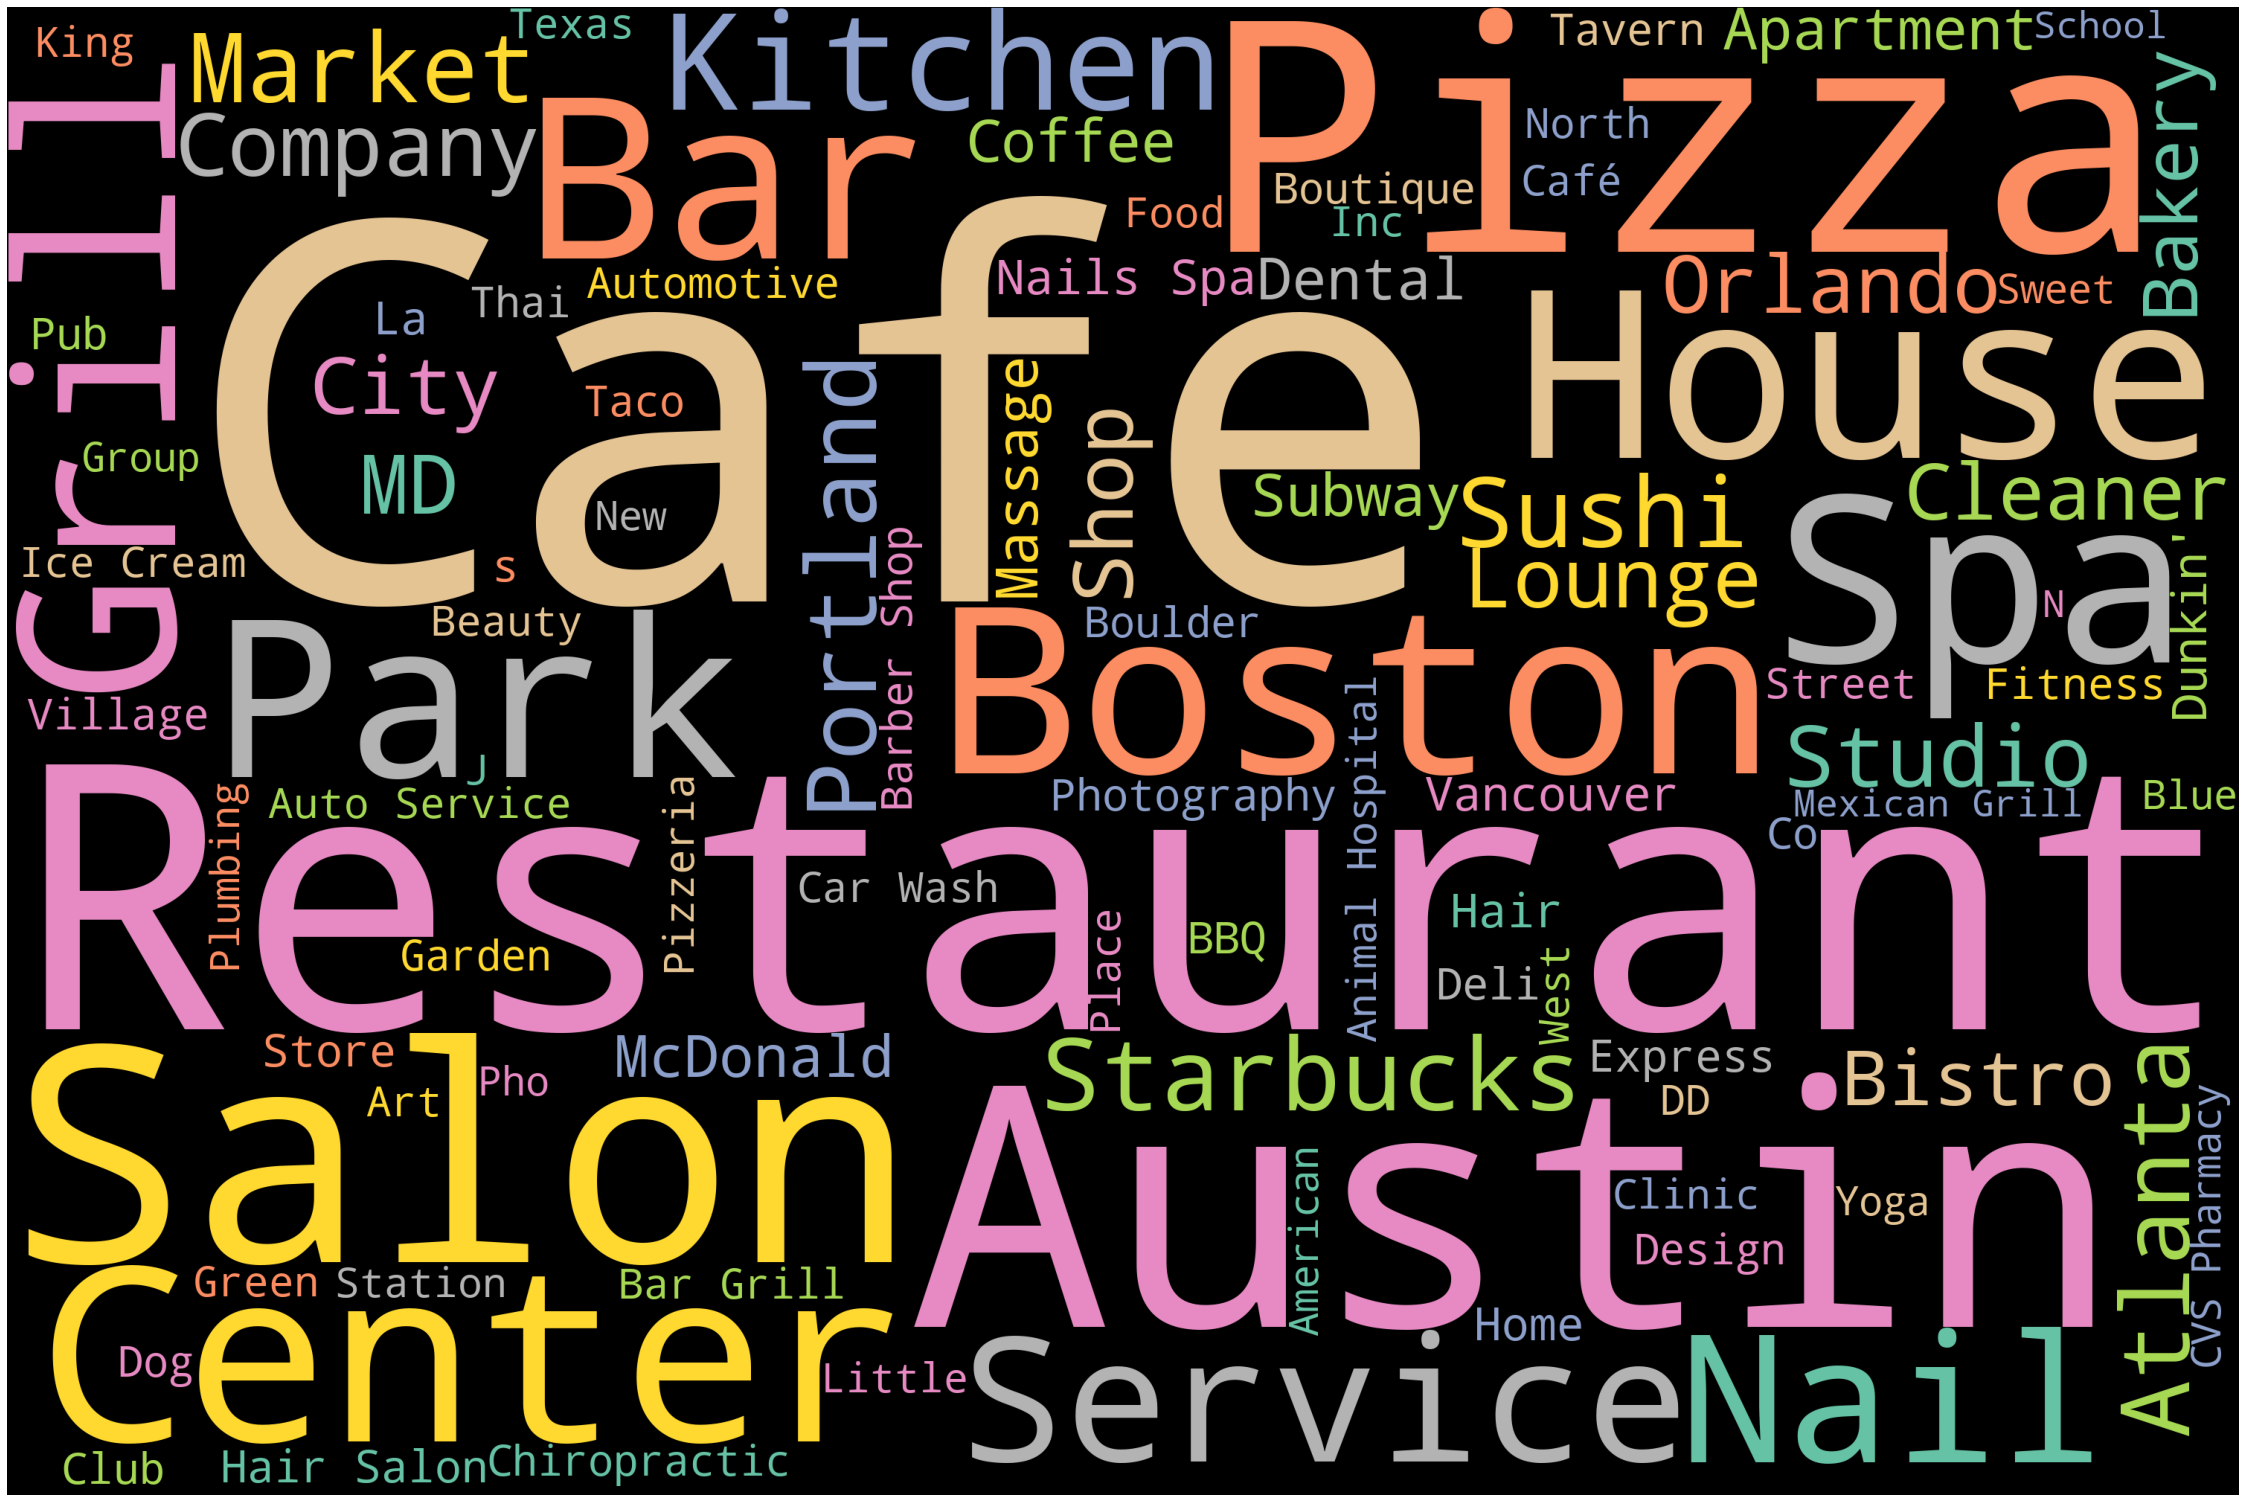

In [78]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [79]:
# Save image
#wordcloud.to_file("wordcloud.png")